In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [4]:
df = pd.read_csv('dataset/income_evaluation.csv')
df.columns=df.columns.str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
              'race', 'sex', 'capita_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [8]:
df.income = np.where(df['income'] == ' >50K', 1, 0)

In [9]:
df.income.value_counts()/df.shape[0]*100

0    75.919044
1    24.080956
Name: income, dtype: float64

In [10]:
df['sex'] = np.where(df['sex'] == ' Male', 1, 0)

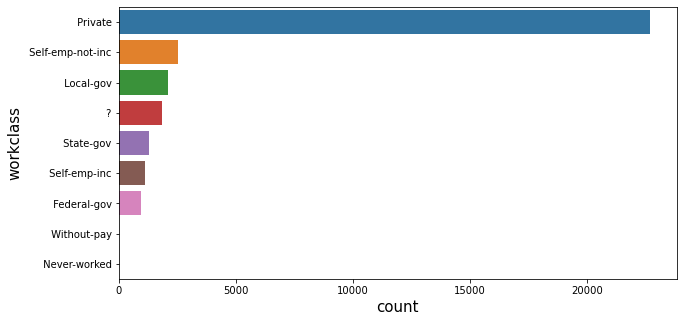

In [11]:
workclass_label = df.workclass.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(workclass_label, workclass_label.index);
plt.ylabel('workclass', fontsize=15);
plt.xlabel('count', fontsize=15);

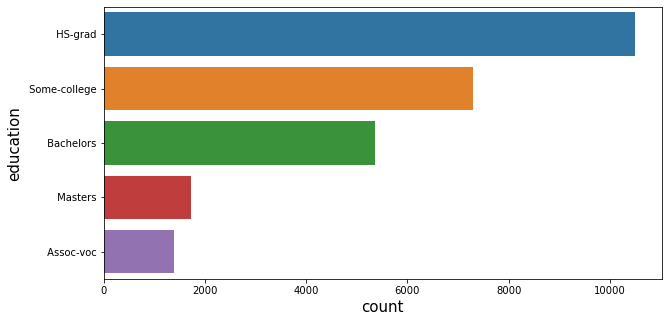

In [12]:
edu_label = df.education.value_counts()[:5]
plt.figure(figsize=(10, 5))
sns.barplot(edu_label, edu_label.index);
plt.ylabel('education', fontsize=15);
plt.xlabel('count', fontsize=15);

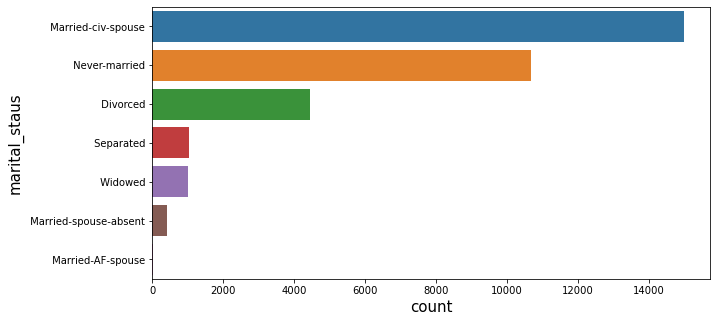

In [13]:
ms_label = df.marital_status.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(ms_label, ms_label.index);
plt.ylabel('marital_staus', fontsize=15);
plt.xlabel('count', fontsize=15);

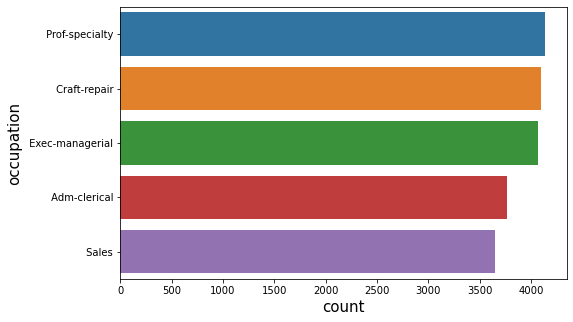

In [14]:
occ_label = df.occupation.value_counts()[:5]
plt.figure(figsize=(8, 5))
sns.barplot(occ_label, occ_label.index);
plt.ylabel('occupation', fontsize=15);
plt.xlabel('count', fontsize=15);

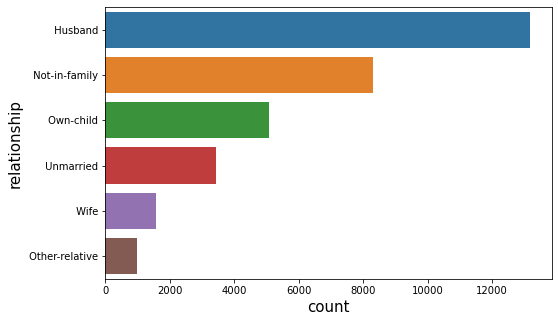

In [15]:
rel_label = df.relationship.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(rel_label, rel_label.index);
plt.ylabel('relationship', fontsize=15);
plt.xlabel('count', fontsize=15);

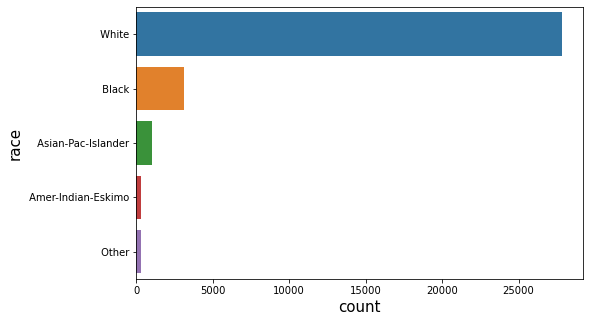

In [16]:
r_label = df.race.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(r_label, r_label.index);
plt.ylabel('race', fontsize=15);
plt.xlabel('count', fontsize=15);

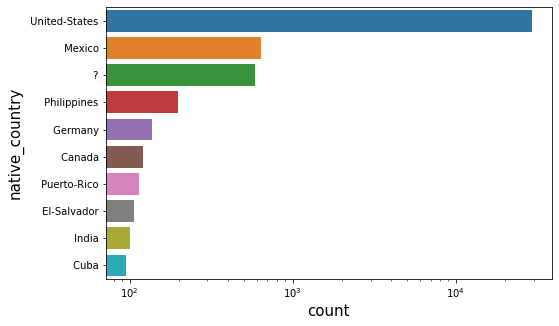

In [17]:
nc_label = df.native_country.value_counts()[:10]
plt.figure(figsize=(8, 5))
sns.barplot(nc_label, nc_label.index, log=True);
plt.ylabel('native_country', fontsize=15);
plt.xlabel('count', fontsize=15);

In [18]:
df['native_country'] = np.where(df['native_country'] == ' United-States', 'United-States', 'Others')

In [19]:
df['workclass'] = np.where(df['workclass'] == ' ?', np.nan, df['workclass'])
df['occupation'] = np.where(df['occupation'] == ' ?', np.nan, df['occupation'])
df.dropna(inplace=True)

In [20]:
edu_label = {value: key for key, value in enumerate(df.education.unique())}
df['education'] = df['education'].map(edu_label)

wc_label = {value: key for key, value in enumerate(df.workclass.unique())}
df['workclass'] = df['workclass'].map(wc_label)

ms_label = {value: key for key, value in enumerate(df.marital_status.unique())}
df.marital_status = df.marital_status.map(ms_label)

occ_label = {value: key for key, value in enumerate(df.occupation.unique())}
df.occupation = df.occupation.map(occ_label)

r_label = {value: key for key, value in enumerate(df.race.unique())}
df.race =  df.race.map(r_label)

df['native_country'] = np.where(df['native_country'] == 'United-States', 1, 0)
rel_label = {value: key for key, value in enumerate(df.relationship.unique())}
df.relationship = df.relationship.map(rel_label)

In [21]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [23]:
pred = lgbm.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.870703125
